Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option("display.max_columns", 200)

# Loading the Dataset and Cleaning Process

In [2]:
music = pd.read_csv(r"C:\Users\Aakash D\Downloads\Analytics\Omega\Machine Learning Projects\Dataset\Spotify_Youtube.csv")

In [3]:
music.shape

(20718, 28)

In [4]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
music.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [6]:
music.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


# Data Cleaning

### The goal of this project is to ultimately make a recommendation system, so some columns such as album type, Uri, comments, description, Official Video, etc


In [7]:
# Discarding the columns that are not required.
music = music[['Artist','Url_spotify','Track','Album',
          'Danceability','Energy','Key','Loudness','Speechiness',
         'Acousticness','Instrumentalness','Liveness','Valence','Tempo']]

In [8]:
music.head()

,Artist,Url_spotify,Track,Album,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953


## Checking for Null values

In [9]:
# As there are only a few values that are missing, it would be good to just drop the values.
music.isna().sum()

Artist              0
Url_spotify         0
Track               0
Album               0
Danceability        2
Energy              2
Key                 2
Loudness            2
Speechiness         2
Acousticness        2
Instrumentalness    2
Liveness            2
Valence             2
Tempo               2
dtype: int64

In [10]:
music = music.dropna()
music.isna().sum()

Artist              0
Url_spotify         0
Track               0
Album               0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

#### The main columns that would be helpful for making a recommendation system are the Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo. The descriptions for each given on the Spotify api documentaion are as follows-

#### Danceability: 
It describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### Energy: 
It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### Key: 
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

#### Loudness: 
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

#### Speechiness: 
This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

#### Acousticness: 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

#### Instrumentalness: 
This predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

#### Liveness: 
It detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

#### Valence: 
It is a measure ranging from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

#### Tempo: 
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



### The main focus for the recommendation system to understand the similarity between 2 tracks, based on the various features of a track and then fetch the track that is most similar to the track that was inputed. So this will be a Content Based Recommendation system, the "Valence" feature is something that classifies the emotion that a track gives off, and was most probably calculated by a deep learning system deployed by spotify, so I will be giving more weightage to Valence out of the other attributes, so that the recommendation system outputs tracks that have their valence similar to the inputed track. To measure the Similarity between tracks, I will be using Cosine Similarity from the Sklearn Library.

In [11]:
# Now to separate the features into Numerical features and Categorical features, Since the numerical features
# are not in the same scale, scaling is required, and for categorical variable like 'Key', the Get dummies 
# function will be helpful.

# To make a backup of the original DataFrame

music_backup = music.copy()

In [12]:
# Numerical Features
numerical_features = music[['Danceability','Energy','Loudness','Speechiness','Acousticness',
                            'Instrumentalness','Liveness','Valence','Tempo']]

# Categorical features
cat_features = pd.get_dummies(music['Key'],prefix = 'Key')

# Object Type Features
obj_features = music[['Artist','Url_spotify','Track','Album']]

In [13]:
# To concatenate the object Features with Categorical features

obj_features = pd.concat([obj_features,cat_features], axis = 1)
obj_features

,Artist,Url_spotify,Track,Album,Key_0.0,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0,Key_11.0
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,0,0,0,0,0,1,0,0,0,0,0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,0,0,0,0,0,0,0,1,0,0,0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0,1,0,0,0,0,0,0,0,0,0,0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,0,1,0,0,0,0,0,0,0,0,0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0,0,0,0,0,1,0,0,0,0,0,0
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0,0,0,0,1,0,0,0,0,0,0,0
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,0,0,0,0,1,0,0,0,0,0,0,0
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
# Scaling Numeric Features and converting the numpy array to dataframe

scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(numerical_features)
numeric_features = pd.DataFrame(numeric_features, columns = numerical_features.columns)

# The scaled Data looks as follows
numeric_features

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.838974,0.704994,0.838905,0.183610,0.008392,0.002330,0.607306,0.777442,0.569330
1,0.693333,0.702994,0.857222,0.031328,0.087248,0.000687,0.032268,0.858006,0.381149
2,0.712821,0.922998,0.897183,0.054149,0.042670,0.046900,0.102993,0.554884,0.443823
3,0.706667,0.738995,0.857328,0.026971,0.000014,0.509000,0.050228,0.582075,0.494810
4,0.680000,0.693994,0.797609,0.177386,0.025401,0.000000,0.056114,0.528701,0.690108
...,...,...,...,...,...,...,...,...,...
20711,0.596923,0.925998,0.846007,0.034025,0.449799,0.000000,0.070421,0.662638,0.369812
20712,0.544615,0.935999,0.942634,0.142116,0.028111,0.000000,0.078945,0.661631,0.718526
20713,0.454359,0.829997,0.881304,0.067116,0.024397,0.000000,0.141553,0.421954,0.691896
20714,0.427692,0.766995,0.895614,0.434647,0.357429,0.018400,0.094876,0.542800,0.638438


In [15]:
# Now to combine both scaled numeric features with the object type features into a single dataframe

features_combined = pd.concat([obj_features,numeric_features], axis = 1)

features_combined = features_combined.dropna()
features_combined

,Artist,Url_spotify,Track,Album,Key_0.0,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0,Key_11.0,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.838974,0.704994,0.838905,0.183610,0.008392,0.002330,0.607306,0.777442,0.569330
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.693333,0.702994,0.857222,0.031328,0.087248,0.000687,0.032268,0.858006,0.381149
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.712821,0.922998,0.897183,0.054149,0.042670,0.046900,0.102993,0.554884,0.443823
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706667,0.738995,0.857328,0.026971,0.000014,0.509000,0.050228,0.582075,0.494810
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.680000,0.693994,0.797609,0.177386,0.025401,0.000000,0.056114,0.528701,0.690108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20711,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596923,0.925998,0.846007,0.034025,0.449799,0.000000,0.070421,0.662638,0.369812
20712,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544615,0.935999,0.942634,0.142116,0.028111,0.000000,0.078945,0.661631,0.718526
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454359,0.829997,0.881304,0.067116,0.024397,0.000000,0.141553,0.421954,0.691896
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427692,0.766995,0.895614,0.434647,0.357429,0.018400,0.094876,0.542800,0.638438


### Before Calculation of the similarity scores with cosine similarity, to get optimal recommendations, in relation to the right similarity with the valence attribute of the input track, lets see other attributes that are highly correlated to the valence features, so weights can be assigned accordingly.


In [16]:
# Finding the Correlation between the numeric Features, for optimal Weight assignment
numeric_features.corr()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Danceability,1.000000,0.236596,0.353408,0.210376,-0.279435,-0.318611,-0.084482,0.465756,-0.065943
Energy,0.236596,1.000000,0.744845,0.065319,-0.658304,-0.310058,0.173717,0.389158,0.157383
Loudness,0.353408,0.744845,1.000000,0.033699,-0.547680,-0.545406,0.087062,0.311578,0.144766
Speechiness,0.210376,0.065319,0.033699,1.000000,-0.077598,-0.109895,0.085463,0.059204,0.037553
Acousticness,-0.279435,-0.658304,-0.547680,-0.077598,1.000000,0.274379,-0.040922,-0.200816,-0.129367
Instrumentalness,-0.318611,-0.310058,-0.545406,-0.109895,0.274379,1.000000,-0.060021,-0.269785,-0.076734
Liveness,-0.084482,0.173717,0.087062,0.085463,-0.040922,-0.060021,1.000000,0.031904,0.006670
Valence,0.465756,0.389158,0.311578,0.059204,-0.200816,-0.269785,0.031904,1.000000,0.090432
Tempo,-0.065943,0.157383,0.144766,0.037553,-0.129367,-0.076734,0.006670,0.090432,1.000000


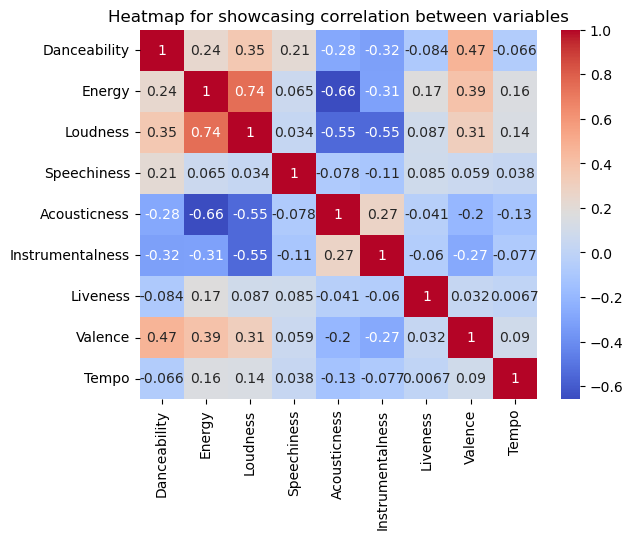

In [17]:
# Heatmap for easy visualization of corr
sns.heatmap(numeric_features.corr(), annot = True, cmap='coolwarm')
plt.title('Heatmap for showcasing correlation between variables')
plt.show()

In [18]:
# Checking correlation between valence and other attributes
numeric_features.corr()["Valence"].sort_values(ascending = False)

Valence             1.000000
Danceability        0.465756
Energy              0.389158
Loudness            0.311578
Tempo               0.090432
Speechiness         0.059204
Liveness            0.031904
Acousticness       -0.200816
Instrumentalness   -0.269785
Name: Valence, dtype: float64

### Observations of the Correlation Matrix
Danceability: This attribute has a positive correlation of 0.465581 with "Valence." Since it's positively correlated and contributes to the musical mood, moderate weight can be assigned to this attribute.

Energy: This too has a positive correlation of 0.388965 with "Valence.".

Loudness: It has a positive correlation of 0.311302 with "Valence.

Tempo: The correlation of 0.090098 is very low, a lower weight can be assigned here.

Speechiness: With a correlation of 0.059123, Speechiness has a small effect on valence. Same goes for Liveness.

Acousticness: This has negative correlation of -0.200613, so it has a inverse relationship with valence.

Instrumentalness: "Instrumentalness" has a negative correlation of -0.269457 with "Valence. A higher weight would be good for this attribute

### Since the weight optimization is an iterative process, the weights that can be assigned with the correlation method is not the only way, and the weights need to be updated as per the quality of recommendations that the system outputs.

In [19]:
weights = {'Valence':0.3,'Danceability':0.15,'Energy':0.15,'Loudness':0.1,
          'Tempo':0.08,'Speechiness':0.05,'Liveness':0.03,
          'Acousticness':-0.1,'Instrumentalness':-0.15}

In [20]:
# Now to apply the weights to the dataframe

for key,weight in weights.items():
    features_combined[key] = features_combined[key] * weight

In [21]:
features_combined_copy = features_combined.copy()

In [31]:
# storing all the numeric weighted Features
weighted_features = features_combined[['Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo']]
categorical_features = features_combined[['Key_0.0', 'Key_1.0', 'Key_2.0', 'Key_3.0', 'Key_4.0', 'Key_5.0',
       'Key_6.0', 'Key_7.0', 'Key_8.0', 'Key_9.0', 'Key_10.0', 'Key_11.0']]

In [23]:
# rescaling the weighted features
weighted_features_scaled = scaler.fit_transform(weighted_features)

In [24]:
weighted_features_scaled = pd.DataFrame(weighted_features_scaled, columns = weighted_features.columns)

In [28]:
# now these features are ready for cosine similarity calculation
weighted_features_scaled = pd.concat([weighted_features_scaled, categorical_features], axis = 1)

(20714, 9)

In [36]:
weighted_features_scaled = weighted_features_scaled.dropna()

In [40]:
weighted_features_scaled

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key_0.0,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0,Key_11.0
0,0.838974,0.704994,0.838905,0.183610,0.991608,0.997670,0.607306,0.777442,0.569330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.693333,0.702994,0.857222,0.031328,0.912752,0.999313,0.032268,0.858006,0.381149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.712821,0.922998,0.897183,0.054149,0.957330,0.953100,0.102993,0.554884,0.443823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.706667,0.738995,0.857328,0.026971,0.999986,0.491000,0.050228,0.582075,0.494810,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.680000,0.693994,0.797609,0.177386,0.974599,1.000000,0.056114,0.528701,0.690108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20709,0.596923,0.925998,0.846007,0.034025,0.550201,1.000000,0.070421,0.662638,0.369812,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20710,0.544615,0.935999,0.942634,0.142116,0.971889,1.000000,0.078945,0.661631,0.718526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20711,0.454359,0.829997,0.881304,0.067116,0.975603,1.000000,0.141553,0.421954,0.691896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20712,0.427692,0.766995,0.895614,0.434647,0.642571,0.981600,0.094876,0.542800,0.638438,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
similarity = cosine_similarity(weighted_features_scaled)

In [45]:
# Here the cosine similarity is calculated for each track
similarity.shape

(20712, 20712)

## Lastly To write a function that will take the name of the track as an input and output 5 tracks similar to the inputed track

In [46]:
# Recommendation Function-
def Generate_Recommendations(song):
    song_index = music[music['Track'] == song].index[0]
    distances = similarity[song_index]
    song_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
    for i in song_list:
        print(music.iloc[i[0]]['Track'],'BY', music.iloc[i[0]]['Artist'])

In [47]:
# For testing the Recommendation function
# Test 1
# Giving an input that has a high valence score and is considered euphoric
Generate_Recommendations('If I Ever Feel Better')

Is This Love BY Bob Marley & The Wailers
Grateful BY NEFFEX
Mi Luz (ft. Rels B) BY Rels B
Me Name Jr. Gong BY Damian Marley
Diva (feat. Lil Tecca) BY The Kid LAROI


In [57]:
# Test 2
# Giving an input which has a heavy metal Genre
Generate_Recommendations('Courtesy Call')

When The Sun Goes Down BY Arctic Monkeys
Angels Fly BY Louis Tomlinson
Enemy (with JID) - from the series Arcane League of Legends BY League of Legends
Don't You Worry Child - Radio Edit BY Swedish House Mafia
You Mean the World to Me BY Toni Braxton


In [49]:
# Test 3
# Giving an Input that is Instrumental
Generate_Recommendations('Cornfield Chase')

Piano Concerto in A Minor, Op. 16: I. Allegro molto moderato BY Edvard Grieg
Road To Perdition BY Thomas Newman
Stars Will Fall BY Duster
Domestic Pressures BY Jóhann Jóhannsson
Tchaikovsky: The Nutcracker, Op. 71, Act I, Scene 1: No. 1, Decoration of the Christmas Tree BY Sir Simon Rattle


In [53]:
# Test 4
# Giving a song that is not euphoric and has a low valence score
Generate_Recommendations('Glimpse of Us')

When You're Gone BY The Cranberries
FLIP THE SWITCH (feat. Drake) BY Quavo
Ojitos Lindos BY Bad Bunny
Cirice BY Ghost
Fear is Not My Future (feat. Brandon Lake & Chandler Moore) BY Kirk Franklin


## Final Observations
1. The recommendation system performs well on Tracks that are instrumental and have little to no vocals.
2. For other Tracks out of 5 tracks that the system recommended, on average 3 tracks sounded similar to the inputted track.
3. A few wrong recommendations were given for a track, this can be due to the lack of diversity in the dataset used, which may have resulted into the recommendations which are not quite similar to the inputted track.
4. The Recommendation system can be further optimised by changing the weights assigned to features, and additional user input over the recommendations that the system provides.


=======================================================================================================